In [20]:
# from dataset.trackml.dataset   import load_event, load_dataset
# from dataset.trackml.randomize import shuffle_hits
# from dataset.trackml.score     import score_event
# from dataset.others import *

import os

import numpy as np
import pandas as pd
from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.cluster.dbscan_ import dbscan
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import operator
%matplotlib inline

event_prefix = 'event000001001'
hits, cells, particles, truth = load_event(os.path.join('train_100_events/', event_prefix))



#######All new pd.dataframe goes here
hits_playground = hits[["x","y","z"]]
hits_playground["r"] =np.sqrt(hits_playground["x"]**2 + hits_playground["y"]**2 + hits_playground["z"]**2)
hits_playground["phi"] = np.degrees(np.arctan2(hits_playground["y"], hits_playground["x"]))
hits_playground["theta"] = np.degrees(np.arccos(hits_playground["z"]/hits_playground["r"]))

# real_particles 
real_particles = particles[particles["particle_id"] != 0]
particles_count = real_particles.shape[0]
neutral_particles = particles[particles["q"] == 0]
hits_playground["r"].ix[particles_count]
no_hits_particles = particles[particles["nhits"] == 0]
new_truth = truth
new_truth['Energy'] = np.sqrt(truth['tpx']**2 + truth['tpy']**2 + truth['tpz']**2)

#new_truth

real_particles['Energy'] = np.sqrt(real_particles['px']**2 + real_particles['py']**2 + real_particles['pz']**2)



real_particles.sort_values("Energy")

truth_playground = truth
truth_playground["r"] =np.sqrt(truth_playground["tx"]**2 + truth_playground["ty"]**2 + truth_playground["tz"]**2)
truth_playground["phi"] = np.degrees(np.arctan2(truth_playground["ty"], truth_playground["tx"]))
truth_playground["theta"] = np.degrees(np.arccos(truth_playground["tz"]/truth_playground["r"]))
truth_playground['Energy'] = np.sqrt(truth['tpx']**2 + truth['tpy']**2 + truth['tpz']**2)

truth_playground

/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,Energy,r,phi,theta
0,1,324262265547128832,-69.290901,-0.794919,-1502.5,-0.511341,0.019336,-11.069000,0.000009,1.108082e+01,1504.097046,-179.342712,177.359436
1,2,45044036452483072,-73.306801,-8.292610,-1502.5,-0.304958,-0.054226,-6.365820,0.000009,6.373351e+00,1504.310181,-173.546021,177.188873
2,3,99080634911162368,-63.819698,-5.603060,-1502.5,-0.195871,-0.036081,-4.654030,0.000011,4.658289e+00,1503.865234,-174.982559,177.558395
3,4,360288863542837248,-72.108704,-9.734450,-1502.5,-0.471937,-0.090322,-9.950480,0.000009,9.962075e+00,1504.260864,-172.311722,177.227448
4,5,175642928088088576,-93.505600,-0.688461,-1502.5,-0.684687,0.025229,-10.986000,0.000011,1.100734e+01,1505.406982,-179.578140,176.438766
5,6,607988217437749248,-94.062500,-0.140013,-1502.5,-0.751325,-0.025789,-12.135300,0.000012,1.215856e+01,1505.441406,-179.914703,176.417770
6,7,301746122836148224,-84.052597,-14.139700,-1502.5,-1.064840,-0.153445,-19.016001,0.000017,1.904641e+01,1504.915649,-170.450851,176.753189
7,8,175642790649135104,-71.731499,-0.651773,-1502.5,-0.230322,-0.017360,-4.940120,0.000009,4.945517e+00,1504.211426,-179.479401,177.266617
8,9,423339945520791552,-69.304298,-0.849361,-1502.5,-1.694400,0.002276,-36.858601,0.000028,3.689753e+01,1504.097778,-179.297836,177.358826
9,10,112593495377575936,-57.617599,-5.953970,-1502.5,-0.398745,-0.029849,-10.357200,0.000010,1.036492e+01,1503.616089,-174.100220,177.792282


In [2]:
truth_hits_in_cone = truth_playground[(truth_playground["theta"].between(2.55, 3.56, inclusive=True)) & (truth_playground["phi"].between(100., 111.56, inclusive=False))] #& hits_playground["theta"]>179]
truth_hits_in_cone["particle_id"]

37536    580966619673526272
37538    639512384037191680
37582    639512384037191680
37611    621504101561139200
37612    779125346875211776
37617    580966619673526272
37654    580966619673526272
37664    621504101561139200
37666    639512384037191680
37740    621504101561139200
39665                     0
39695    387319394839035904
39699    580966619673526272
39705    324262884022419456
39707    603500010973167616
39715    639512384037191680
39755     49546948885086208
39756    621504101561139200
39758    639512384037191680
39764    729587743838961664
39780    580966619673526272
39786    387319394839035904
39787    324262884022419456
39790    603500010973167616
39800    729587743838961664
39802     49546948885086208
39804    621504101561139200
39815    387319394839035904
39816    580966619673526272
39820    639512384037191680
                ...        
45286     49546948885086208
45297                     0
45302    603500010973167616
45303    387319394839035904
45304     4954694888

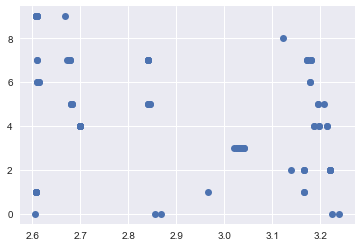

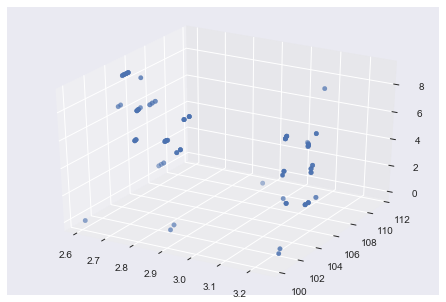

In [29]:
from sklearn.cluster import KMeans

X = truth_hits_in_cone[["theta", "phi"]]

kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

kmeans.labels_


plt.plot(X["theta"], kmeans.labels_, "o")
plt.show()


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X["theta"], X["phi"], kmeans.labels_)


In [32]:
truth_hits_in_cone["kmean_label"] = kmeans.labels_

truth_hits_in_cone

/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,Energy,r,phi,theta,kmean_label
37536,37537,580966619673526272,-8.236380,32.271500,602.0,-0.051002,0.232459,4.244050,0.000013,4.250718e+00,602.920654,104.317459,3.166752,2
37538,37539,639512384037191680,-8.568910,32.772099,602.0,-0.069897,0.230860,4.280730,0.000012,4.287520e+00,602.952271,104.653053,3.220573,2
37582,37583,639512384037191680,-8.497170,32.529900,597.5,-0.067431,0.230131,4.281970,0.000013,4.288680e+00,598.445190,104.639191,3.220634,2
37611,37612,621504101561139200,-11.321400,29.647400,597.5,-0.373032,0.950068,19.366800,0.000026,1.939368e+01,598.342224,110.900261,3.040407,3
37612,37613,779125346875211776,-9.668470,29.410601,597.5,-0.047593,0.116752,2.473090,0.000000,2.476302e+00,598.301514,108.197807,2.966099,1
37617,37618,580966619673526272,-8.182700,32.025501,597.5,-0.050542,0.231593,4.244820,0.000015,4.251434e+00,598.413635,104.332756,3.166505,2
37654,37655,580966619673526272,-8.242390,32.298901,602.5,-0.051739,0.232485,4.244000,0.000011,4.250678e+00,603.421387,104.315819,3.166690,2
37664,37665,621504101561139200,-11.418200,29.892799,602.5,-0.376665,0.950489,19.366100,0.000020,1.939307e+01,603.349182,110.905426,3.040214,3
37666,37667,639512384037191680,-8.577080,32.799000,602.5,-0.069604,0.231039,4.280670,0.000010,4.287466e+00,603.453064,104.654915,3.220573,2
37740,37741,621504101561139200,-11.331100,29.671900,598.0,-0.373415,0.949917,19.366699,0.000023,1.939358e+01,598.842896,110.900841,3.040343,3


Estimated number of clusters: 10
DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    min_samples=10, n_jobs=1, p=None)
(114,)
<bound method DataFrame.all of           theta         phi
37536  3.166752  104.317459
37538  3.220573  104.653053
37582  3.220634  104.639191
37611  3.040407  110.900261
37612  2.966099  108.197807
37617  3.166505  104.332756
37654  3.166690  104.315819
37664  3.040214  110.905426
37666  3.220573  104.654915
37740  3.040343  110.900841
39665  2.605642  100.166779
39695  2.682923  103.230324
39699  3.173236  104.010757
39705  2.840831  104.194191
39707  2.608420  104.889221
39715  3.220513  105.005707
39755  2.700086  106.065514
39756  3.037573  111.012413
39758  3.220634  104.989899
39764  2.607369  108.267235
39780  3.172990  104.023849
39786  2.682996  103.223602
39787  2.840831  104.214249
39790  2.608345  104.897209
39800  2.607369  108.257278
39802  2.700086  106.063118
39804  3.037509  111.017708
39815  2.682996  103.231094
39816  3.17

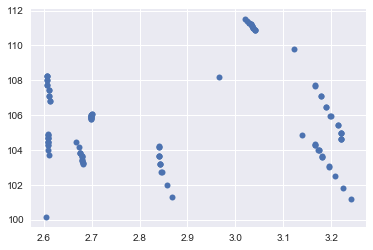

In [19]:
pd.unique(truth_hits_in_cone["particle_id"])

X = truth_hits_in_cone[["theta", "phi"]]
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = 10

print('Estimated number of clusters: %d' % n_clusters_)




#X = truth_hits_in_cone
unique_labels = set(labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 10)]
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]

#     class_member_mask = (labels == k)

#     xy = X[class_member_mask & core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=14)

#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=6)
    
# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()

print(db)
print(labels.shape)


plt.plot(X["theta"], X["phi"], 'o',
             markeredgecolor='k', markersize=6)


print(X.all)

In [16]:
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(n_clusters_)

3


Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


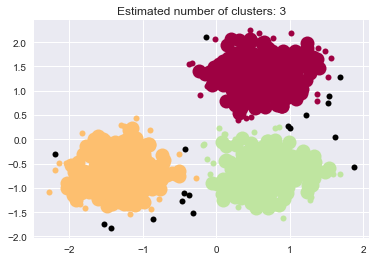

In [5]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
X.shape